In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandasql import sqldf
from scipy.stats import lognorm

pysqldf = lambda q: sqldf(q, globals())

def LogNormbyAvgStdNum(row):
    
    avg=row["avg"]
    std=row["std"]
    num=row["payment"]

    var=std*std
    sigma2=np.log(1+(var/(avg*avg)))
    sigma =np.sqrt(sigma2)
    mu = np.log(avg)-(.5*sigma)
    
    r = lognorm.rvs(sigma, loc=0,scale=np.exp(mu), size=num)
    return r

In [46]:
folder = "../dataset/"
#basic_stats
names=['zipcode','date','category','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
basic_stats = pd.io.parsers.read_table(folder + 'basic_stats000',sep='\t', names=names, parse_dates=["date"])

#gender distribution
names=['zipcode','date','category','gender','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
gender_distribution = pd.io.parsers.read_table(folder + 'gender_distribution000',sep='\t', names=names, parse_dates=["date"])

In [47]:
basic_stats_restaurants=basic_stats[basic_stats["category"]=="es_barsandrestaurants"]
gender_distribution_restaurants=gender_distribution[gender_distribution["category"]=="es_barsandrestaurants"]
basic_stats_restaurants[3:4]

,zipcode,date,category,merchant,card,payment,avg,max,min,std
33,8001,2014-07-04,es_barsandrestaurants,89,447,457,25.51,187,1.1,23.913212


In [58]:
gender_distribution_restaurants_34=gender_distribution_restaurants[gender_distribution_restaurants["zipcode"]==8001]
gender_distribution_restaurants_34=gender_distribution_restaurants_34[gender_distribution_restaurants_34["date"]=="2014-07-04"]
gender_distribution_restaurants_34
#gender_distribution_restaurants_34.ix[22494]

,zipcode,date,category,gender,merchant,card,payment,avg,max,min,std
22494,8001,2014-07-04,es_barsandrestaurants,unknown,27,303,309,25.51,118.75,1.1,19.952131
53924,8001,2014-07-04,es_barsandrestaurants,female,41,53,55,24.57,137.60,3.0,22.800214
67406,8001,2014-07-04,es_barsandrestaurants,male,53,77,79,29.15,187.00,3.0,36.303650
72030,8001,2014-07-04,es_barsandrestaurants,enterprise,7,14,14,8.62,27.25,1.6,6.107891


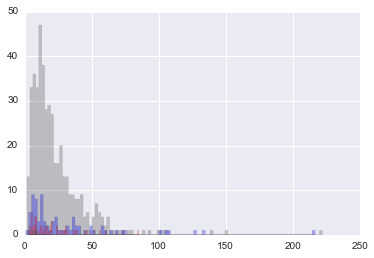

In [62]:
row=basic_stats_restaurants.ix[33]
row_unknown = gender_distribution_restaurants_34.ix[22494]
row_female = gender_distribution_restaurants_34.ix[53924]
row_male = gender_distribution_restaurants_34.ix[67406]
row_enterprise = gender_distribution_restaurants_34.ix[72030]


fig, ax = plt.subplots(1, 1)
ax.hist(LogNormbyAvgStdNum(row),  bins=100, histtype='stepfilled', color='black', alpha=0.2)
ax.hist(LogNormbyAvgStdNum(row_male),  bins=100, histtype='stepfilled', color='blue', alpha=0.3)
ax.hist(LogNormbyAvgStdNum(row_female),  bins=100, histtype='stepfilled', color='red', alpha=0.3)
ax.hist(LogNormbyAvgStdNum(row_enterprise),  bins=100, histtype='stepfilled', color='yellow', alpha=0.3)

plt.show()

In [70]:
cut100_gender_distribution_restaurants=gender_distribution_restaurants[:100]
cut100_gender_distribution_restaurants["distribution"] = ""
for i in cut100_gender_distribution_restaurants.index:
    cut100_gender_distribution_restaurants["distribution"][i] = LogNormbyAvgStdNum(cut100_gender_distribution_restaurants.ix[i])

/Users/x/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/x/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


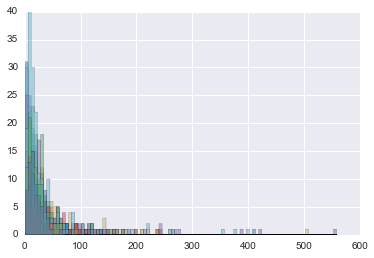

In [83]:
cut100_gender_distribution_restaurants_male=cut100_gender_distribution_restaurants[cut100_gender_distribution_restaurants["gender"]=="male"]
cut100_gender_distribution_restaurants_female=cut100_gender_distribution_restaurants[cut100_gender_distribution_restaurants["gender"]=="female"]


fig, ax = plt.subplots(1, 1)
ax.hist(cut100_gender_distribution_restaurants_male["distribution"], bins=100, histtype='stepfilled',  alpha=0.5)

plt.show()


KeyError: 0

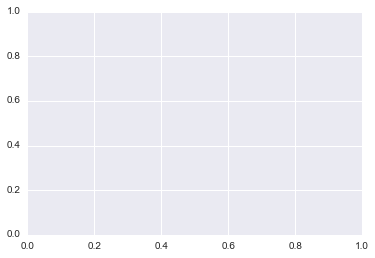

In [84]:

fig, ax = plt.subplots(1, 1)
ax.hist(cut100_gender_distribution_restaurants_female["distribution"], bins=100, histtype='stepfilled',  alpha=0.5)

plt.show()